# **Yelp Sentiment Analysis**


---



**Importing the libraries**


---



In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

**Importing the dataset**


---



In [88]:
yelp = pd.read_csv('yelp.csv')

In [89]:
yelp.shape

(10000, 10)

In [90]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [91]:
yelp['length'] = yelp['text'].apply(len)

In [92]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


**Data Processing and Visualization**


---



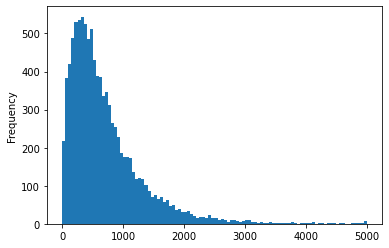

In [93]:
yelp['length'].plot(bins = 100, kind = 'hist')

In [94]:
yelp.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

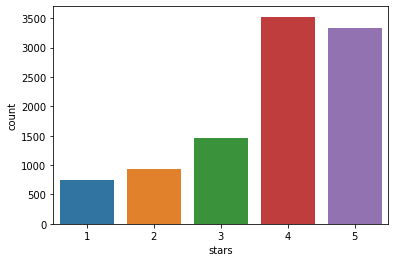

In [95]:
sns.countplot(yelp['stars'])

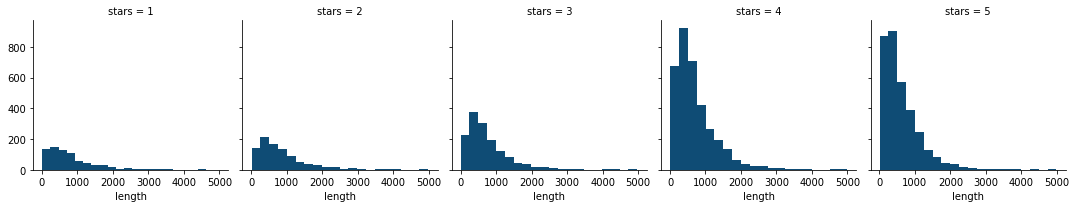

In [96]:
histogram = sns.FacetGrid(data = yelp, col = 'stars', col_wrap = 5)
histogram.map(plt.hist, 'length', bins = 20, color = '#0F4C75')

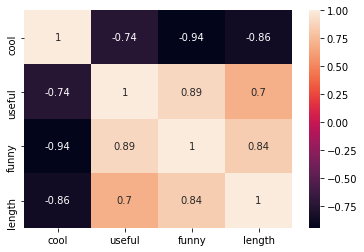

In [97]:
stars_group_data = yelp.groupby('stars').mean()
sns.heatmap(data=stars_group_data.corr(), annot=True)

In [98]:
yelp_1 = yelp[yelp['stars']== 1]
yelp_5 = yelp[yelp['stars']== 5]
yelp = pd.concat([yelp_1, yelp_5])
yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


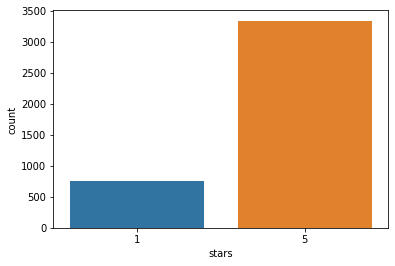

In [108]:
sns.countplot(yelp['stars']) 

In [99]:
nltk.download('stopwords')
def process_text(message):
  text_with_no_punc = [char for char in message if char not in string.punctuation]
  text_with_no_punc = ''.join(text_with_no_punc)
  text_with_no_stopwords = [word for word in text_with_no_punc.split() if word.lower() not in stopwords.words('english')]
  return text_with_no_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
count_vectorizer = CountVectorizer(analyzer = process_text)
yelp_vectoized = count_vectorizer.fit_transform(yelp['text'])

In [101]:
yelp_vectoized.shape

(4086, 26435)

In [102]:
y = yelp['stars'].values
X_train, X_test, y_train, y_test = train_test_split(yelp_vectoized, y, test_size=0.2, random_state=0)

**Training and Evaluating the model**


---



In [103]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

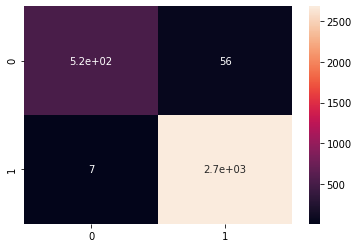

In [104]:
y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

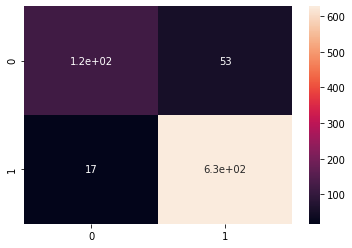

In [105]:
y_pred_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [106]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.88      0.69      0.77       173
           5       0.92      0.97      0.95       645

    accuracy                           0.91       818
   macro avg       0.90      0.83      0.86       818
weighted avg       0.91      0.91      0.91       818

